In [10]:
import geopandas as gpd
from shapely.geometry import Point
import geoplot as gplt
import matplotlib.pyplot as plt

In [2]:
suburbs = gpd.read_file('../../../data/Melbourne_Boundaries/SAL_2021_AUST_GDA2020.shp')
suburbs_victoria = suburbs[suburbs['STE_NAME21'] == 'Victoria']

In [3]:
# melbourne_boundary = gpd.read_file('../../data/Melbourne_Boundaries/GreaterMelbourne_GDA94latlong_Grid500m_ABS2011.shp')
# combined_boundary = melbourne_boundary.union_all()
# combined_gdf = gpd.GeoDataFrame(geometry=[combined_boundary], crs=melbourne_boundary.crs)

melbourne = gpd.read_file(gplt.datasets.get_path("melbourne"))

In [4]:
combined_geom = melbourne.geometry.iloc[0]  # Get the actual shapely geometry
# suburbs_within = suburbs_victoria[suburbs_victoria.geometry.within(combined_geom)]
suburbs_within = suburbs_victoria[suburbs_victoria.geometry.intersects(combined_geom)]

In [5]:
if suburbs_within.crs != melbourne.crs:
    suburbs_within = suburbs_within.to_crs(melbourne.crs)

In [9]:
# Project to VicGrid (meters-based projection for Victoria, Australia)
suburbs_within = suburbs_within.to_crs(epsg=3111)

# Define Melbourne CBD point (in WGS84), then convert to VicGrid
melbourne_cbd_wgs84 = Point(144.962398, -37.814245)  # Lon, Lat
melbourne_cbd_proj = gpd.GeoSeries([melbourne_cbd_wgs84], crs='EPSG:4326').to_crs(epsg=3111).iloc[0]

# Buffer around the point in meters (e.g. 6000m = 6km)
buffer = melbourne_cbd_proj.buffer(15000)

# Filter suburbs that intersect the buffer
central_suburbs = suburbs_within[suburbs_within.intersects(buffer)]
central_suburbs = central_suburbs.to_crs(epsg=4326)

<Axes: >

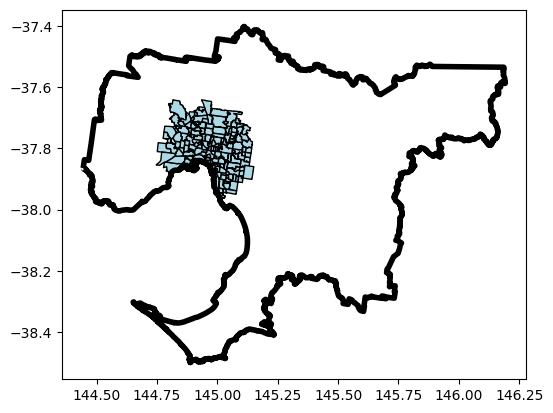

In [12]:
# melbourne_boundary = gpd.read_file('../../data/Melbourne_Boundaries/GreaterMelbourne_GDA94latlong_Grid500m_ABS2011.shp')
# combined_boundary = melbourne_boundary.union_all()
# combined_gdf = gpd.GeoDataFrame(geometry=[combined_boundary], crs=melbourne_boundary.crs)#
fig,ax=plt.subplots()
central_suburbs.plot(color='lightblue',edgecolor="black",ax=ax)
melbourne.plot(color='none',edgecolor="black",linewidth=4, ax=ax)

In [19]:
central_suburbs.to_file(f"../../../data/SpatialData/MelbourneSuburbs.shp", driver='ESRI Shapefile')